In [1]:
import sys
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#ignore
def create_adjacency_matrix(num_nodes, edges):
    # Initialize the adjacency matrix with infinity (no edges)
    graph = [[float('inf')] * num_nodes for _ in range(num_nodes)]
    
    # Set distance from a node to itself as 0
    for i in range(num_nodes):
        graph[i][i] = 0
    
    # Add the edges to the adjacency matrix
    for u, v, weight in edges:
        graph[u][v] = weight  # For directed graphs, use graph[v][u] for undirected
        graph[v][u] = weight  #for undirected graph
    
    return graph

# Example usage:
num_nodes = 5
edges = [
    (0, 1, 4),  # edge from node 0 to node 1 with weight 4
    (0, 3, 8),  # edge from node 0 to node 3 with weight 8
    (1, 2, 2),  # edge from node 1 to node 2 with weight 2
    (2, 3, 1),  # edge from node 2 to node 3 with weight 1
    (3, 4, 3)   # edge from node 3 to node 4 with weight 3
]

# Create the adjacency matrix
adj_matrix = create_adjacency_matrix(num_nodes, edges)

# Print the adjacency matrix
for row in adj_matrix:
    print(row)



[0, 4, inf, 8, inf]
[4, 0, 2, inf, inf]
[inf, 2, 0, 1, inf]
[8, inf, 1, 0, 3]
[inf, inf, inf, 3, 0]


In [3]:
class Priority_Queue_Array:
    def __init__(self):
        # Initialize the priority queue as an empty list
        self.queue = []
        
    def insert(self, node, priority):
        # insert new element (node, priority) into the priority queue
        self.queue.append((priority, node))
        
    def getMin(self):
        min_index =0
        comparisons =0
        #find index of the minimum element
        for i in range(1, len(self.queue)):
            comparisons +=1
            if self.queue[i][0] < self.queue[min_index][0]:
                min_index = i
        #return the minimum element and remove it from the queue
        return self.queue.pop(min_index)[1], comparisons #return the node, not priority

    def remove(self, node):
        # Remove a specific node from the queue if it's present
        for i in range(len(self.queue)):
            if self.queue[i][1] == node:
                del self.queue[i]
                return

In [4]:
def dijkstra(graph, source):
    n = len(graph)
    d = [math.inf] * n
    pi = [None] * n
    d[source] = 0
    S = [0] * n
    
    pq = Priority_Queue_Array()

    key_comparisons = 0 #count number of key comparisons

    for i in range(n):
        pq.insert(i, d[i])

    while len(pq.queue) > 0:
        u, comparisons= pq.getMin()
        key_comparisons += comparisons
        S[u] = 1

        for v in range(n):
            if graph[u][v] !=0 and S[v] == 0:
                key_comparisons += 1
                if d[u] + graph[u][v] < d[v]:
                    pq.remove(v)
                    d[v] = d[u] + graph[u][v]
                    pi[v] = u
                    pq.insert(v, d[v])
              
    return d, pi, key_comparisons

In [5]:
#create adjacency matrix
def adjacency_matrix(V, E, min_weight, max_weight):
    #initialise empty adjacency matrix
    adj_matrix = np.zeros((V,V), dtype=int)

    #generate a spanning tree to ensure graph is connected
    nodes = list(range(V))
    random.shuffle(nodes) #shuffle nodes to generate random connections

    for i in range(1, V):
        u = nodes[i]
        v = nodes[random.randint(0, i-1)]
        weight = random.randint(min_weight, max_weight)
        adj_matrix[u][v] = weight
        adj_matrix[v][u] = weight  #undirected graph

    edges_added = V-1 #initial number of edges (spanning tree)
    while edges_added < E:
        u,v = random.sample(range(V), 2)
        if adj_matrix[u][v] == 0: #if no edge exists between u and v
            weight = random.randint(min_weight, max_weight)
            adj_matrix[u][v] = weight
            adj_matrix[v][u] = weight  #undirected graph
            edges_added +=1

    return adj_matrix

matrix = adjacency_matrix(5,6,1,20)
print(matrix)

[[ 0  0 19  0  0]
 [ 0  0 20 18  8]
 [19 20  0  8  0]
 [ 0 18  8  0  6]
 [ 0  8  0  6  0]]


# Part a)

## Using array as a priority queue

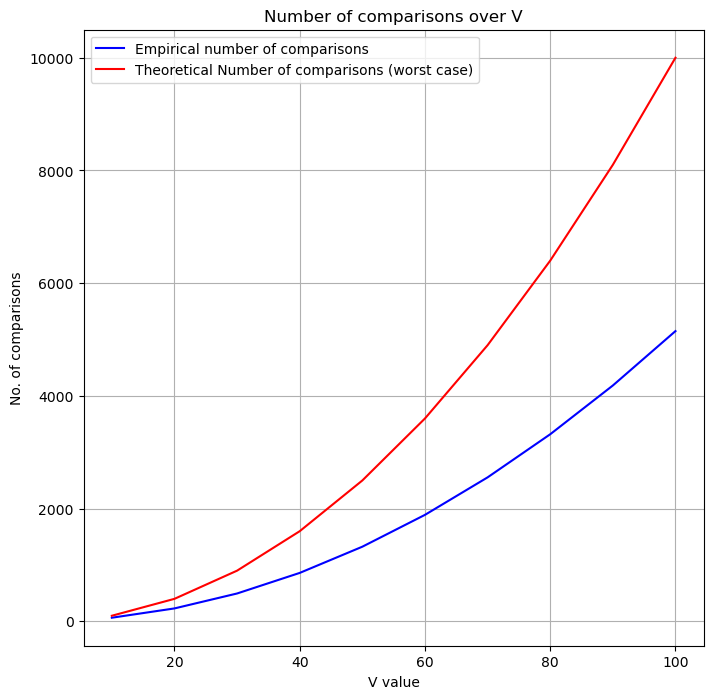

In [6]:
x = []
key_comp_results = []

edge_multiplier = 2
min_weight = 1
max_weight = 20

x_theory_worst = []
y_theory_worst = []

for V in range(10,101,10):
    x.append(V)
    E = edge_multiplier * V
    graph = adjacency_matrix(V, E, min_weight, max_weight)
    _, _, key_comp = dijkstra(graph, 0)
    key_comp_results.append(key_comp)
    x_theory_worst.append(V)
    y_theory_worst.append(V * V)

                    
plt.figure(figsize=(8,8))

# Plot the data

plt.plot(x, key_comp_results, linestyle='-', color='blue', label='Empirical number of comparisons')

plt.plot(x_theory_worst, y_theory_worst, linestyle='-', color='red', label='Theoretical Number of comparisons (worst case)')

# Adding title and labels
plt.title('Number of comparisons over V')
plt.xlabel('V value')
plt.ylabel('No. of comparisons')


# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

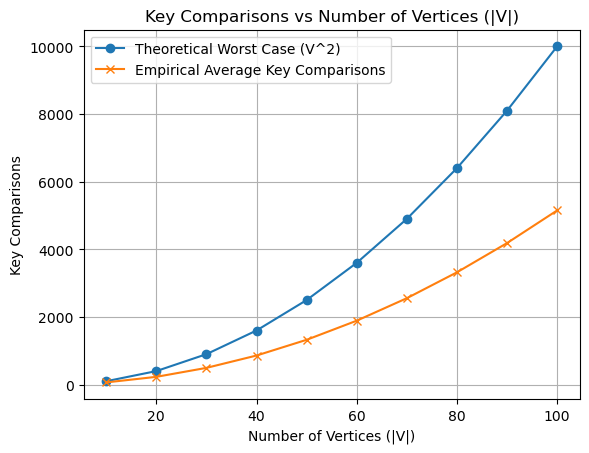

In [7]:
x = []
key_comp_results = []

edge_multiplier = 2
min_weight = 1
max_weight = 10

x_theory_worst = []
y_theory_worst = []

num_tests = 10  # Number of tests to run at each step

for V in range(10, 101, 10):
    x.append(V)
    
    # Generate the number of edges based on the edge multiplier
    E = edge_multiplier * V
    
    total_key_comparisons = 0  # Initialize total key comparisons for this V
    
    # Run the test multiple times
    for _ in range(num_tests):
        # Create the adjacency matrix for the graph
        graph = adjacency_matrix(V, E, min_weight, max_weight)
        
        # Run Dijkstra's algorithm and get the key comparisons
        _, _, key_comp = dijkstra(graph, 0)
        
        # Accumulate the key comparisons
        total_key_comparisons += key_comp

    # Calculate the average key comparisons for this V
    average_key_comp = total_key_comparisons / num_tests
    key_comp_results.append(average_key_comp)

    # Append V to x_theory_worst
    x_theory_worst.append(V)
    
    # Append V * V to y_theory_worst for the worst-case theoretical complexity
    y_theory_worst.append(V * V)

# Now, you can use x_theory_worst and key_comp_results for plotting or further analysis
plt.plot(x_theory_worst, y_theory_worst, label='Theoretical Worst Case (V^2)', marker='o')
plt.plot(x, key_comp_results, label='Empirical Average Key Comparisons', marker='x')
plt.title("Key Comparisons vs Number of Vertices (|V|)")
plt.xlabel("Number of Vertices (|V|)")
plt.ylabel("Key Comparisons")
plt.legend()
plt.grid(True)
plt.show()

# Part b)

## Using heap as a priority queue

In [8]:
class MinHeap:
    def __init__(self):
        self.heap = []
        self.comparisons = 0  # Counter to track number of comparisons

    def swap(self, i, j):
        """Helper function to swap two elements in the heap."""
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

    def fix_heap(self, index):
        """Fixes the heap upwards from a given index to maintain heap property."""
        parent = (index - 1) // 2
        while index > 0 and self.heap[index][1] < self.heap[parent][1]:
            self.comparisons += 1  # Count the comparison
            self.swap(index, parent)
            index = parent
            parent = (index - 1) // 2

    def heapify(self, index):
        """Fixes the heap downwards from a given index to maintain heap property."""
        while True:
            left = 2 * index + 1
            right = 2 * index + 2
            smallest = index

            if left < len(self.heap) and self.heap[left][1] < self.heap[smallest][1]:
                self.comparisons += 1  # Count the comparison
                smallest = left

            if right < len(self.heap) and self.heap[right][1] < self.heap[smallest][1]:
                self.comparisons += 1  # Count the comparison
                smallest = right

            if smallest != index:
                self.swap(index, smallest)
                index = smallest
            else:
                break

    def insert(self, node, distance):
        """Inserts a new (node, distance) tuple into the heap."""
        self.heap.append((node, distance))
        self.fix_heap(len(self.heap) - 1)

    def getMin(self):
        """Returns and removes the minimum element (node, distance) from the heap."""
        if not self.heap:
            return None

        # Swap the root with the last element and remove the last element
        min_elem = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()

        # Restore the heap property
        if self.heap:
            self.heapify(0)

        return min_elem

    def isEmpty(self):
        """Checks if the heap is empty."""
        return len(self.heap) == 0

    def find_index(self, node):
        """Helper function to find the index of a given node."""
        for i, (n, _) in enumerate(self.heap):
            #self.comparisons += 1  # Count the comparison
            if n == node:
                return i
        return None

    def remove(self, node):
        """Removes a node based on the node name."""
        index = self.find_index(node)
        if index is None:
            return False  # Node not found

        # Swap the node with the last element and remove it
        self.swap(index, len(self.heap) - 1)
        self.heap.pop()

        # Restore the heap property by either fixing up or down
        if index < len(self.heap):
            self.fix_heap(index)
            self.heapify(index)

        return True

    def get_comparisons(self):
        """Returns the number of comparisons made."""
        return self.comparisons



In [9]:
def dijkstra_Heap(graph, source):
    n = len(graph)
    d = [math.inf] * n
    pi = [None] * n
    d[source] = 0
    S = [0] * n
    
    heap = MinHeap()

    #key_comparisons = 0 #count number of key comparisons

    for i in range(n):
        heap.insert(i, d[i])

    while not heap.isEmpty():
        u, weight= heap.getMin()
        #key_comparisons += comparisons
        S[u] = 1

        for v in range(n):
            if graph[u][v] !=0 and S[v] == 0:
                #key_comparisons += 1
                if d[u] + graph[u][v] < d[v]:
                    heap.remove(v)
                    d[v] = d[u] + graph[u][v]
                    pi[v] = u
                    heap.insert(v, d[v])
              
    return d, pi, heap.get_comparisons()

In [10]:
dijkstra_Heap(matrix, 0)

([0, 39, 19, 27, 33], [None, 2, 0, 2, 3], 5)

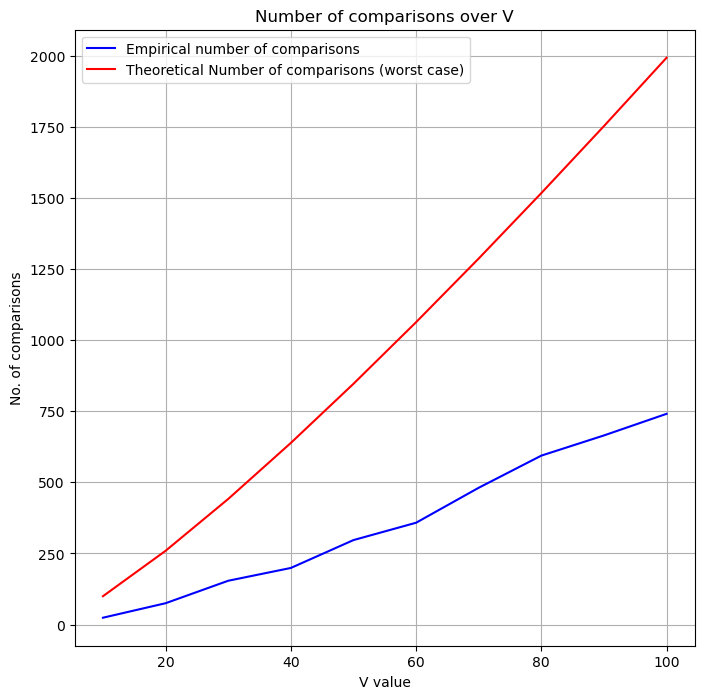

In [11]:
x = []
key_comp_results = []

edge_multiplier = 2
min_weight = 1
max_weight = 20

x_theory_worst = []
y_theory_worst = []

for V in range(10,101,10):
    x.append(V)
    E = edge_multiplier * V
    graph = adjacency_matrix(V, E, min_weight, max_weight)
    _, _, key_comp = dijkstra_Heap(graph, 0)
    key_comp_results.append(key_comp)
    x_theory_worst.append(V)
    y_theory_worst.append((V+E) * np.log2(V))

                    
plt.figure(figsize=(8,8))

# Plot the data

plt.plot(x, key_comp_results, linestyle='-', color='blue', label='Empirical number of comparisons')

plt.plot(x_theory_worst, y_theory_worst, linestyle='-', color='red', label='Theoretical Number of comparisons (worst case)')

# Adding title and labels
plt.title('Number of comparisons over V')
plt.xlabel('V value')
plt.ylabel('No. of comparisons')


# Show grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

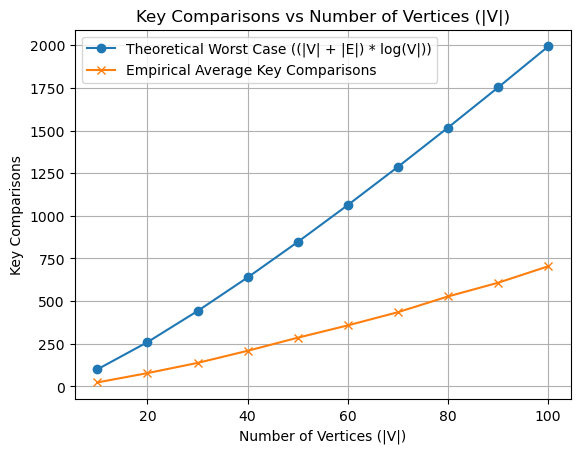

In [12]:
x = []
key_comp_results = []

edge_multiplier = 2
min_weight = 1
max_weight = 10

x_theory_worst = []
y_theory_worst = []

num_tests = 10  # Number of tests to run at each step

for V in range(10, 101, 10):
    x.append(V)
    
    # Generate the number of edges based on the edge multiplier
    E = edge_multiplier * V
    
    total_key_comparisons = 0  # Initialize total key comparisons for this V
    
    # Run the test multiple times
    for _ in range(num_tests):
        # Create the adjacency matrix for the graph
        graph = adjacency_matrix(V, E, min_weight, max_weight)
        
        # Run Dijkstra's algorithm and get the key comparisons
        _, _, key_comp = dijkstra_Heap(graph, 0)
        
        # Accumulate the key comparisons
        total_key_comparisons += key_comp

    # Calculate the average key comparisons for this V
    average_key_comp = total_key_comparisons / num_tests
    key_comp_results.append(average_key_comp)

    # Append V to x_theory_worst
    x_theory_worst.append(V)
    
    # Append V * V to y_theory_worst for the worst-case theoretical complexity
    y_theory_worst.append((V+E) * np.log2(V))

# Now, you can use x_theory_worst and key_comp_results for plotting or further analysis
plt.plot(x_theory_worst, y_theory_worst, label='Theoretical Worst Case ((|V| + |E|) * log(V|))', marker='o')
plt.plot(x, key_comp_results, label='Empirical Average Key Comparisons', marker='x')
plt.title("Key Comparisons vs Number of Vertices (|V|)")
plt.xlabel("Number of Vertices (|V|)")
plt.ylabel("Key Comparisons")
plt.legend()
plt.grid(True)
plt.show()

## Increase |V|:
###  - for each V = n:
###      - increase |E| from connected to fully connected graph

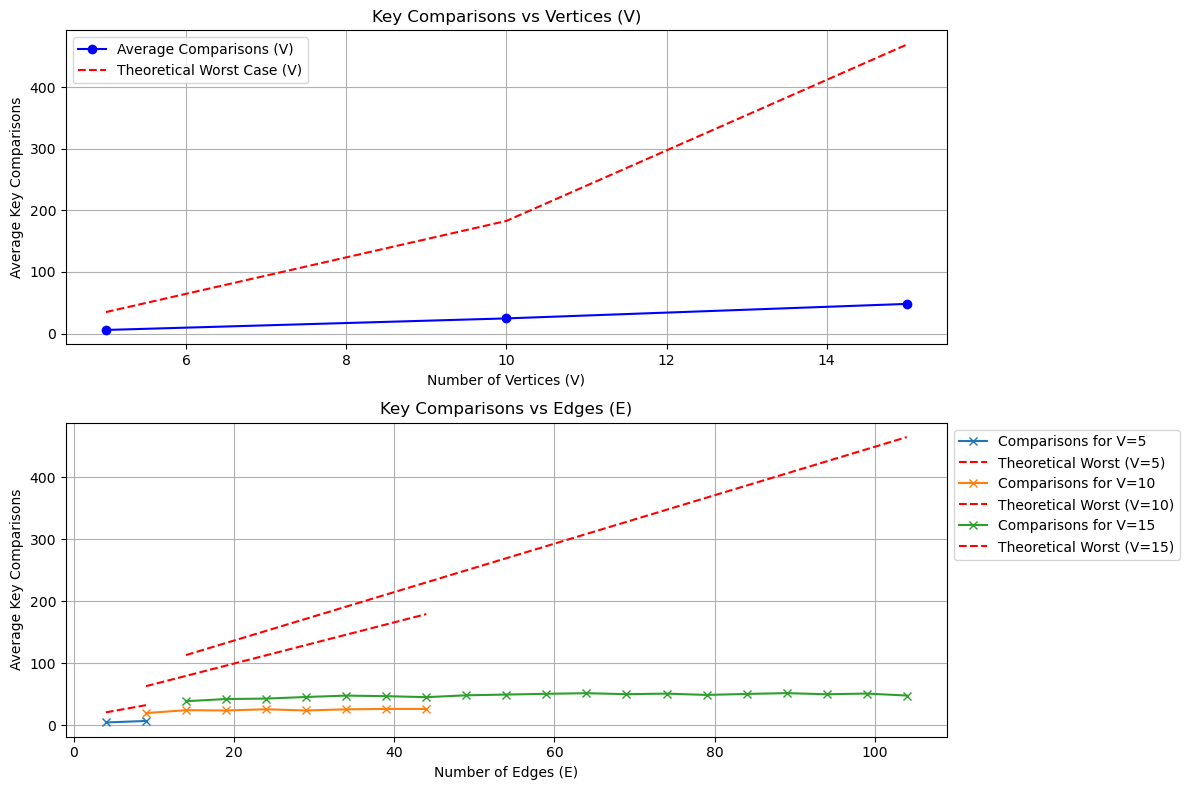

In [13]:
# Initialize variables
num_tests = 10
min_weight = 1
max_weight = 10

x_V = []
y_V = []

x_E_dict = {}  # To store x_E values for each V
y_E_dict = {}  # To store y_E values for each V
y_theory_worst_E_dict = {}  # To store theoretical worst-case for each V and E

y_theory_worst = []

# Iterate over the number of vertices
for V in range(5, 20, 5):
    x_V.append(V)
    
    # Theoretical worst case for comparison (assuming E depends on V)
    y_theory_worst.append((V + V*(V-1)/2) * np.log2(V))  # Complete graph worst case
    
    total_key_comparisons_V = 0  # Reset the comparison count for each V

    # Initialize lists to store (E, average_comparisons) for this specific V
    x_E = []
    y_E = []
    y_theory_worst_E = []

    # Iterate over the number of edges for this V
    for E in range(V - 1, int(V * (V - 1) / 2), 5):
        x_E.append(E)  # Track edges for this V
        total_key_comparisons_E = 0  # Reset total comparisons for each edge set
        
        # Perform multiple tests for each (V, E) pair
        for i in range(num_tests):
            # Generate graph and run Dijkstra (assuming functions are defined elsewhere)
            graph = adjacency_matrix(V, E, min_weight, max_weight)
            _, _, comparisons = dijkstra_Heap(graph, 0)
            
            total_key_comparisons_E += comparisons
        
        # Append the average key comparisons for this specific E
        y_E.append(total_key_comparisons_E / num_tests)

        # Calculate the theoretical worst case for this V and E
        y_theory_worst_E.append((V + E) * np.log2(V))
    
    # Store average comparisons for a given V
    y_V.append(np.mean(y_E))  # Average comparisons across edges for a given V
    
    # Save x_E and y_E for this V
    x_E_dict[V] = x_E
    y_E_dict[V] = y_E
    y_theory_worst_E_dict[V] = y_theory_worst_E

# Plot the results
plt.figure(figsize=(12, 8))

# Plot for vertices V
plt.subplot(2, 1, 1)
plt.plot(x_V, y_V, label='Average Comparisons (V)', color='blue', marker='o')
plt.plot(x_V, y_theory_worst, label='Theoretical Worst Case (V)', linestyle='--', color='red')
plt.title('Key Comparisons vs Vertices (V)')
plt.xlabel('Number of Vertices (V)')
plt.ylabel('Average Key Comparisons')
plt.legend()
plt.grid(True)

# Plot for edges E (for different values of V)
plt.subplot(2, 1, 2)
for V in x_E_dict:
    # Plot actual comparisons for this V
    plt.plot(x_E_dict[V], y_E_dict[V], label=f'Comparisons for V={V}', marker='x')
    # Plot theoretical worst-case comparisons for this V
    plt.plot(x_E_dict[V], y_theory_worst_E_dict[V], linestyle='--', color='red', label=f'Theoretical Worst (V={V})')

plt.title('Key Comparisons vs Edges (E)')
plt.xlabel('Number of Edges (E)')
plt.ylabel('Average Key Comparisons')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
